# Objective: Create plots of stellar mass vs. conditional mass function

In [1]:
import os

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from astropy.io.ascii import read
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
import fitsio
import seaborn

In [4]:
# Reading in the RedMaPPer iSEDfit catalog.
rmpath = os.path.join(os.sep, 'global', 'work', 'projects', 'redmapper')
rmcatfile = os.path.join(rmpath, 'redmapper_isedfit_v5.10_centrals.fits.gz')
rminfo = fitsio.FITS(rmcatfile)
rmcat = rminfo[1].read(columns=['Z', 'MSTAR_50', 'ILUM', 'LAMBDA_CHISQ', 'P_CEN', 'P_SAT'])

In [5]:
#rminfo[1]

In [6]:
# This function accepts two 1x2 arrays. The first is the richness bounds. The second is the redshift bounds.
def cutter(lbounds, zbounds):
    keep = np.where((rmcat['LAMBDA_CHISQ'] > lbounds[0]) * (rmcat['LAMBDA_CHISQ'] < lbounds[1]) * 
                    (rmcat['Z'] > zbounds[0]) * (rmcat['Z'] < zbounds[1]))[0]
    return keep

In [7]:
# Goal: Create some clean subplots, reminiscent of those in the paper (but better).
# How do I compute the Conditional Mass Function (CMF)?
# Create little slices of richness and redshift.
# Compute the volume of the little slices of Z, RA, Dec.
# Figure out which sources are in each slice.
# Compute the CMF of each slice of heavenly goodness.
# Plot CMF vs. M*.

/usr/local/anaconda3/envs/py35/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


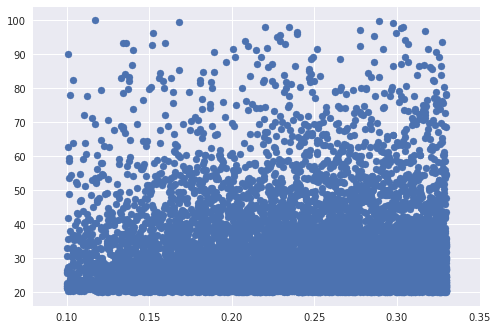

In [8]:
keep = cutter([20, 100], [0.1, 0.33])
fig, ax = plt.subplots()
ax.scatter(rmcat['Z'][keep], rmcat['LAMBDA_CHISQ'][keep])

## Computing the Conditional Mass Function

$$ \Phi = \Phi_C + \Phi_S $$

$$ \Phi_C(M) = \frac{\Sigma_{i \in clusters} \Sigma_{j \in galaxies \, in \, i}p_{cen,j}}{N_{cl}\Delta\log M} $$

$$ \Phi_S(M) = \frac{\Sigma_{i \in clusters} \Sigma_{j \in galaxies \, in \, i}p_{mem,j}(1-p_{cen,j})}{N_{cl}\Delta\log M} $$

This just means add up the component for each galaxy in each cluster... Very pain-in-the-ass notation.

Map richness to M500

In [15]:
masschunks = np.linspace(min(rmcat['MSTAR_50'][keep]), max(rmcat['MSTAR_50'][keep]), 20)*10**12
print(masschunks)
mdiff = masschunks[1]-masschunks[0]
# Do I need to index based on mass too?

[  8.94391346e+12   9.12335782e+12   9.30280219e+12   9.48224655e+12
   9.66169091e+12   9.84113528e+12   1.00205796e+13   1.02000240e+13
   1.03794684e+13   1.05589127e+13   1.07383571e+13   1.09178015e+13
   1.10972458e+13   1.12766902e+13   1.14561345e+13   1.16355789e+13
   1.18150233e+13   1.19944676e+13   1.21739120e+13   1.23533564e+13]


In [16]:
phic = np.sum(rmcat['P_CEN'][keep])/(len(keep)*np.log10(mdiff))
phis = np.sum((rmcat['P_SAT'][keep]+rmcat['P_CEN'][keep])*(1-rmcat['P_CEN'][keep]))/(len(keep)*mdiff)

In [19]:
print(phis)
phi = phic+phis

1.80176885615e-11


ValueError: x and y must have same first dimension, but have shapes (20,) and (1,)

/usr/local/anaconda3/envs/py35/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


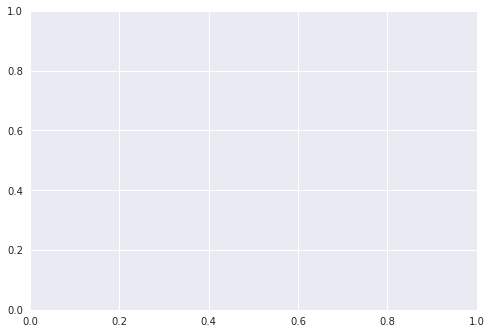

In [21]:
plt.plot(masschunks, phi, 'ko')